In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import seaborn as sns

## Individual Kernels

### Radial Basis Kernel

In [2]:
x = torch.linspace(-2, 2, 150).reshape(-1, 1)

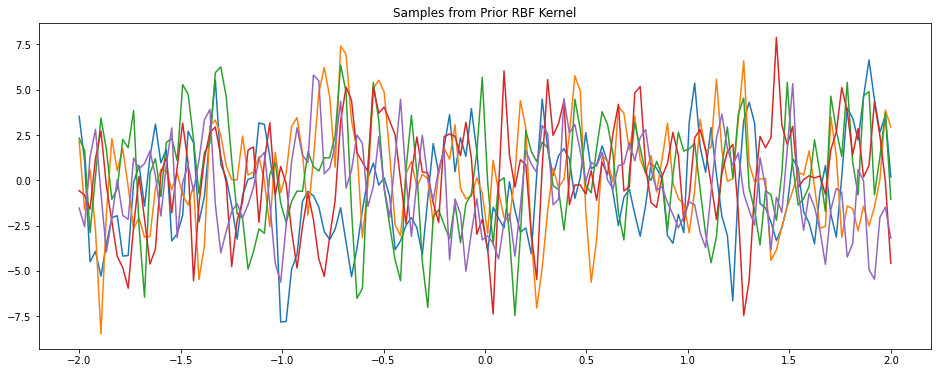

In [3]:
rbf_lengthscale_prior = gpytorch.priors.GammaPrior(2, 0.15)
rbf_outputscale_prior = gpytorch.priors.GammaPrior(2, 5)
lengthscale_constraint = gpytorch.constraints.Interval(0.02, 0.03)
outputscale_constraint = gpytorch.constraints.Interval(5, 10)

rbf_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
        #lengthscale_prior=rbf_lengthscale_prior
        lengthscale_constraint=lengthscale_constraint
    ),
    #outputscale_prior=rbf_outputscale_prior,
    outputscale_constraint=outputscale_constraint
    )

#rbf_kernel.lengthscale = rbf_lengthscale_prior.mean
#rbf_kernel.base_kernel.lengthscale = rbf_lengthscale_prior.mean
#rbf_kernel.outputscale = rbf_outputscale_prior.mean

kernel_func = rbf_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel_func
)

mvd_samples = mvd.sample(torch.Size([5]))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior RBF Kernel')
plt.show()

### Periodic Kernel

In [4]:
x = torch.linspace(-2, 2, 150).reshape(-1, 1)

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(


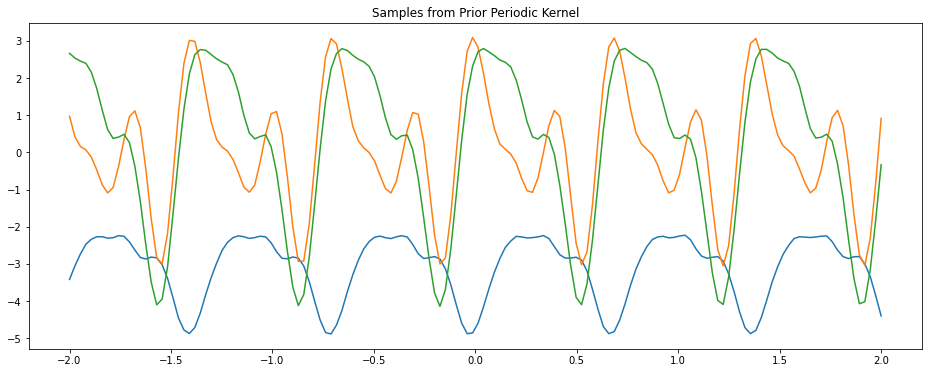

In [20]:
periodic_prior = gpytorch.priors.GammaPrior(2, 1)
periodic_lengthscale_prior = gpytorch.priors.GammaPrior(1, 1)
periodic_outputscale_prior = gpytorch.constraints.Interval(5, 6)

periodic_kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
    period_length_prior=periodic_prior
    ),
    outputscale_constraint=periodic_outputscale_prior
)

periodic_kernel.base_kernel.lengthscale = periodic_lengthscale_prior.mean

periodic_kernel_func = periodic_kernel(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=periodic_kernel_func
)

mvd_samples = mvd.sample(torch.Size([3]))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Periodic Kernel')
plt.show()

### Rational Quadratic Kernel

In [8]:
x = torch.linspace(-2, 2, 150).reshape(-1, 1)

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


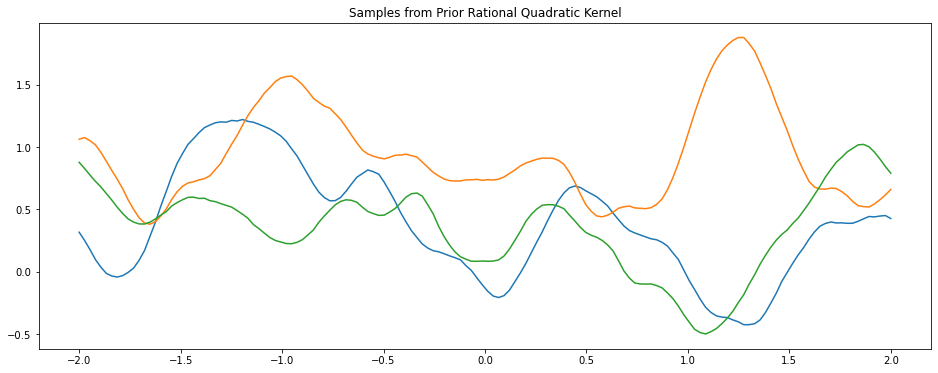

In [9]:
#periodic_prior = gpytorch.priors.GammaPrior(2, 1)
#periodic_lengthscale_prior = gpytorch.priors.GammaPrior(2, 1)

alpha = gpytorch.priors.GammaPrior(2, 0.5)
alpha_const = gpytorch.constraints.Interval(0.1, 0.11)
length_const = gpytorch.constraints.Interval(0.5, 0.51)

rational_quadratic = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel(
        alpha_constraint=alpha_const,
        lengthscale_constraint=length_const
    )
)

#rational_quadratic.alpha = alpha.mean

rational_quadratic_func = rational_quadratic(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=rational_quadratic_func
)

mvd_samples = mvd.sample(torch.Size([3]))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Rational Quadratic Kernel')
plt.show()

In [10]:
x = torch.linspace(-2, 2, 150).reshape(-1, 1)

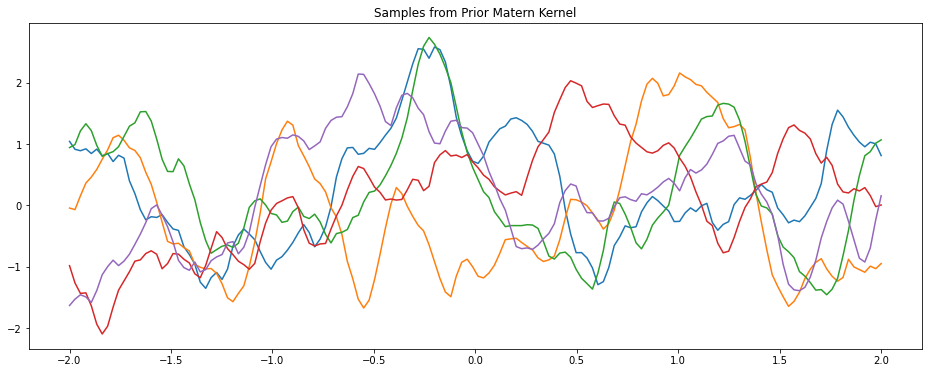

In [11]:
#periodic_prior = gpytorch.priors.GammaPrior(2, 1)
#periodic_lengthscale_prior = gpytorch.priors.GammaPrior(2, 1)
nu = 3/2
mat_lengthscale = gpytorch.constraints.Interval(0.2, 0.201)

matern = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        nu=nu,
        lengthscale_constraint=mat_lengthscale)
)

#periodic_kernel.lengthscale = periodic_lengthscale_prior.mean

matern_func = matern(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=matern_func
)

mvd_samples = mvd.sample(torch.Size([5]))

plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Matern Kernel')
plt.show()

## Kernel Compositions

### Quasi-Periodic

Product of stationary kernel with a non-stationary kernel. Product means probabilistic "AND"

In [12]:
local_kernel_func = gpytorch.kernels.ProductKernel(periodic_kernel, rational_quadratic)
local_kernel = local_kernel_func(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=local_kernel
)

mvd_samples = mvd.sample(torch.Size([5]))

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


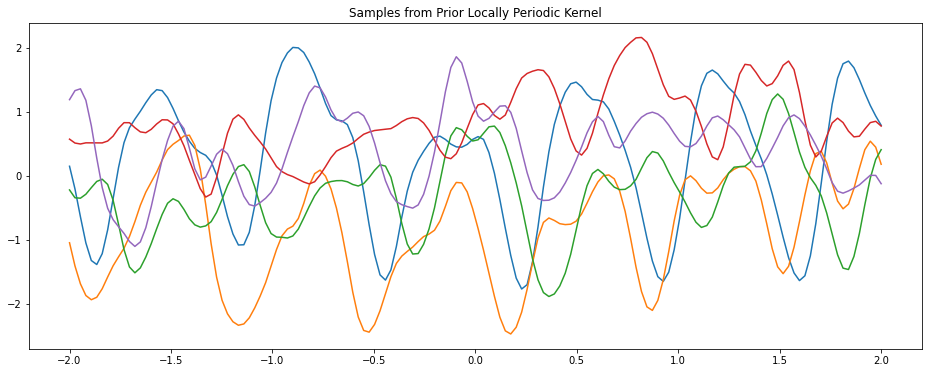

In [13]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Locally Periodic Kernel')
plt.show()

### Addition

Adding kernels is an elementwise addition of their corresponding covariance matrices. This means the covariances of the matrices of the two added kernels will only have a low value if both of their covariances have a low value
 - The addition can be interpreted as the probablistic "OR"

In [14]:
kernel_func = gpytorch.kernels.AdditiveKernel(rbf_kernel, periodic_kernel)
kernel = kernel_func(x)

mvd = gpytorch.distributions.MultivariateNormal(
    mean=torch.zeros(150),
    covariance_matrix=kernel
)

mvd_samples = mvd.sample(torch.Size([5]))

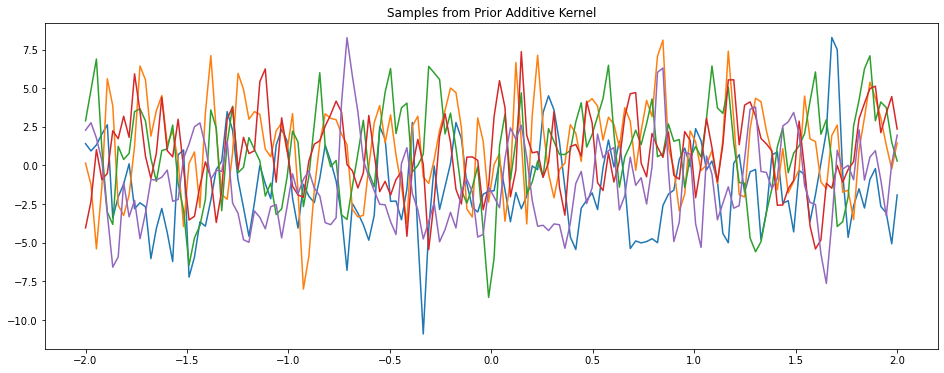

In [15]:
plt.figure(figsize=(16, 6))
[plt.plot(x, sample) for sample in mvd_samples]
plt.title('Samples from Prior Additive Kernel')
plt.show()